# What sells a car?

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day.
The main goal of our analysis is to study data collected over the last few years and determine which factors influence 
the price of a vehicle. 

The steps of our study will be:

    - make data clean (find and fix missing values, duplicates, outliers, change data types if it is wrong)
    
    - study core parameters: price, the vehicle's age when the ad was placed, mileage, number of cylinders and car condition
    
    - study how many days advertisements were displayed 
    
    - analyze the number of ads and the average price for each type of vehicle
    
    - study whether the price of the most popular types of vehicle depends on such factors as  age, mileage, condition, 
    transmission type, and color.

### Description of the data

The dataset contains the following fields:
price

model_year

model

condition

cylinders

fuel— gas, diesel, etc.

odometer— the vehicle's mileage when the ad was published

transmission

paint_color

is_4wd— whether the vehicle has 4-wheel drive (Boolean type)

date_posted— the date the ad was published

days_listed— from publication to removal

## Initialization

First we have to load libraries that we believe are required for the project. 

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Load data

Then we load the project data and have a look at the general information

In [2]:
# Load the data file into a DataFrame
try:
    df=pd.read_csv('/datasets/vehicles_us.csv')
except:
    df=pd.read_csv('C:/Projects/datasets/vehicles_us.csv')

In [3]:
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Explore initial data

Let's explore the fields of our data to make ourself familiar with it.

In [4]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print a sample of data
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71



It is also important to find if there are any duplicates in the data. As we see, there are any so we can proceed our analisis

In [6]:
print(df.duplicated().sum())

0


From the first look at our data we can see:

- The data contains has 13 columns and 51525 rows.
-  5 parametres has missing values: model_year, cylinders,  odometer, paint_color  and is_4wd. The most amount of missing values is in column 'is_4wd'. 
- some columns are with inappropriate values type: parameters model_year, cylinders, odometer should be integer, not float, parameter is_4wd should be bool, not float and parameter date_posted should be datetime64[ns].
-  there are no duplicates in our data

So our next steps should be:

- to study missing values in columns model_year, cylinders, odometer, paint_color, is_4wd and decide what to do with them. 
- to change data types in columns model_year, odometer, cylinders is_4wd and date_posted


## Treat missing values (if any)

The first column where we have missing values is 'model_year'. Let's see how many of them and what persentage of data have this problem. 

In [7]:
df['model_year'].isna().sum()

3619

In [8]:
df['model_year'].isna().sum()/len(df)

0.07023774866569626

7% of data has missing values in column 'model_year'. Not a big amount but it can make difficulties in our analysis. 
We should do something with it. We think that we can use the most common value for the name of the model to treat 
missing values in this column.

In [9]:
model_year_dict = df.groupby('model')['model_year'].apply(lambda x: x.value_counts().idxmax()).to_dict()
print(model_year_dict)

{'acura tl': 2005.0, 'bmw x5': 2012.0, 'buick enclave': 2012.0, 'cadillac escalade': 2007.0, 'chevrolet camaro': 2014.0, 'chevrolet camaro lt coupe 2d': 2017.0, 'chevrolet colorado': 2016.0, 'chevrolet corvette': 2006.0, 'chevrolet cruze': 2014.0, 'chevrolet equinox': 2013.0, 'chevrolet impala': 2008.0, 'chevrolet malibu': 2013.0, 'chevrolet silverado': 2008.0, 'chevrolet silverado 1500': 2014.0, 'chevrolet silverado 1500 crew': 2018.0, 'chevrolet silverado 2500hd': 2006.0, 'chevrolet silverado 3500hd': 2013.0, 'chevrolet suburban': 2007.0, 'chevrolet tahoe': 2007.0, 'chevrolet trailblazer': 2005.0, 'chevrolet traverse': 2011.0, 'chrysler 200': 2015.0, 'chrysler 300': 2013.0, 'chrysler town & country': 2013.0, 'dodge charger': 2014.0, 'dodge dakota': 2005.0, 'dodge grand caravan': 2016.0, 'ford econoline': 2016.0, 'ford edge': 2013.0, 'ford escape': 2008.0, 'ford expedition': 2011.0, 'ford explorer': 2013.0, 'ford f-150': 2013.0, 'ford f-250': 2006.0, 'ford f-250 sd': 2015.0, 'ford f-2

In [10]:
df['model_year'] = df.apply(lambda x: model_year_dict[x['model']] if np.isnan(x['model_year']) else x['model_year'],
                            axis = 1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [12]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Done. It is no missing values in column 'model_year' and we checked that we evrything did right. As we can see in the raw data in the table above, there were Nan value in row2 for the ford f-150. The most common year for this model of car is 2013. The new distribution shows that now row 2 has no missing value in column 'model year', it has value '2013'.	

Let's have a look to the column 'odometer'. We have 15% missing values here. We are going to replace them with median of condition value.

In [13]:
df['odometer'].isna().sum()

7892

In [14]:
df['odometer'].isna().sum()/len(df)

0.15316836487142163

In [15]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model' , 'model_year'])['odometer'].transform('mean'))

In [16]:
df['odometer'].isna().sum()/len(df)

0.0016108685104318293

We replace the majority of missing values, but not all of them. Let's think what we can do else. Maybe replace the rest of them with means for model year.

In [17]:
df['odometer']=df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('mean'))

In [18]:
df['odometer'].isna().sum()/len(df)

1.940805434255216e-05

Yes, it looks a little bit better now.

Our next step is to fix Nan values in column 'cylinders'. Let's see how many of them.

In [19]:
df['cylinders'].isna().sum()/len(df)

0.10208636584182436

In [20]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We have 3,4,5,6,8, 12 cylinders cars and 10% of missing values and we need something to do with them. We think that that the number of cylinders depends on model of the car. So we'll replace missing values with the most common values for the name of 
the model of the car as we did with model year column.

In [21]:
cylinders_dict = df.groupby('model')['cylinders'].apply(lambda x: x.value_counts().idxmax()).to_dict()
print(cylinders_dict)

{'acura tl': 6.0, 'bmw x5': 6.0, 'buick enclave': 6.0, 'cadillac escalade': 8.0, 'chevrolet camaro': 6.0, 'chevrolet camaro lt coupe 2d': 6.0, 'chevrolet colorado': 6.0, 'chevrolet corvette': 8.0, 'chevrolet cruze': 4.0, 'chevrolet equinox': 4.0, 'chevrolet impala': 6.0, 'chevrolet malibu': 4.0, 'chevrolet silverado': 8.0, 'chevrolet silverado 1500': 8.0, 'chevrolet silverado 1500 crew': 8.0, 'chevrolet silverado 2500hd': 8.0, 'chevrolet silverado 3500hd': 8.0, 'chevrolet suburban': 8.0, 'chevrolet tahoe': 8.0, 'chevrolet trailblazer': 6.0, 'chevrolet traverse': 6.0, 'chrysler 200': 4.0, 'chrysler 300': 6.0, 'chrysler town & country': 6.0, 'dodge charger': 6.0, 'dodge dakota': 6.0, 'dodge grand caravan': 6.0, 'ford econoline': 8.0, 'ford edge': 6.0, 'ford escape': 4.0, 'ford expedition': 8.0, 'ford explorer': 6.0, 'ford f-150': 8.0, 'ford f-250': 8.0, 'ford f-250 sd': 8.0, 'ford f-250 super duty': 8.0, 'ford f-350 sd': 8.0, 'ford f150': 8.0, 'ford f150 supercrew cab xlt': 6.0, 'ford f2

In [22]:
df['cylinders'] = df.apply(lambda x: cylinders_dict[x['model']] if np.isnan(x['cylinders']) else x['cylinders'],
                            axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Column 'cylinders' looks fine now.

The next problem column is 'is_4wd'. This column has the most amount of missing values (50%). It's interesting to look what 
unique values are in this column. What a surprise...just '1' and there are no '0'. Probably coder was hurry and put just 
true values. So we need to replace nan values with '0'.

In [24]:
df['is_4wd'].isna().sum()/len(df)

0.5036972343522562

In [25]:
df['is_4wd'].unique()

array([ 1., nan])

In [26]:
df['is_4wd']=df['is_4wd'].fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We can see that there are cells without answers about color of the cars. There is 18% of them. In our opinion, the color doesn't correlate with any parameters and I prefer to left it what it is. Just replace the Nan values with 'unknown'.

In [28]:
df['paint_color'].isna().sum()/len(df)

0.17985443959243086

In [29]:
df['paint_color']=df['paint_color'].fillna('unknow')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Now we have data without missing values.

## Fix data types

Our next step is to change data types in columns where it need to be done. First of all we'll change float type to integer for columns 'model_year', 'odometer' and 'cylinders'.

In [31]:
df['model_year']=df['model_year'].astype('int')

In [32]:
df['cylinders']=df['cylinders'].astype('int')

There are still some Nan values in column 'odometer', we need to drop them before data type changing. 

In [33]:
df=df.dropna(subset = ['odometer'])

In [34]:
df['odometer']=df['odometer'].astype('int')

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\487272191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['odometer']=df['odometer'].astype('int')


The data type of the column 'is_4wd' we'll change to bool

In [35]:
df['is_4wd'] = df['is_4wd'].astype('bool')

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\2924918500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_4wd'] = df['is_4wd'].astype('bool')


And the last thing we should to change data type of the column 'date_posted'

In [36]:
df['date_posted'] = pd.to_datetime(df['date_posted'])


C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\3896208267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_posted'] = pd.to_datetime(df['date_posted'])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int32         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int32         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  int32         
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  bool          
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 4.6+ MB


Now the data looks fine.

## Enrich data

Our next steps will be to add additional factors to the data to make the analysis easier. We will add:
- datatime values
- vehicle's age when the ad was placed
- vehicle's average mileage per year
- rename condition parameter

In [38]:
# Add datetime values for when the ad was placed
print(df['date_posted'].dt.day_name())

0         Saturday
1           Friday
2         Thursday
3           Friday
4          Tuesday
           ...    
51520    Wednesday
51521    Wednesday
51522     Thursday
51523       Monday
51524      Tuesday
Name: date_posted, Length: 51524, dtype: object


In [39]:
print(df['date_posted'].dt.month_name())

0            June
1         October
2        February
3           March
4           April
           ...   
51520     October
51521    November
51522    November
51523        July
51524        June
Name: date_posted, Length: 51524, dtype: object


In [40]:
print(df['date_posted'].dt.year)

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: date_posted, Length: 51524, dtype: int64


In [41]:
# Add the vehicle's age
df['age'] = df['date_posted'].dt.year - df['model_year'] + 1

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\1609641619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['date_posted'].dt.year - df['model_year'] + 1


In [42]:
df['age'].unique()

array([  8,   6,   7,  17,   3,   5,   4,  12,   2,  11,   9,   1,  16,
        15,  10,  14,  18,  13,  54,  25,  19,  20,  27,  23,  39,  21,
        24,  45,  22,  26,  34,  43,  32,  44,  30,  29,  47,  53,  50,
        31,  41,  55,  40,  51,  28,  33,  56,  38,  57,  35,  46,  42,
        52,  64,  48,  49,  37,  36,  66,  58,  72,  59,  60, 111,  83,
        70,  61], dtype=int64)

Let's count average mileage. 

In [43]:
# Add the vehicle's average mileage per year
df['average_mileage']= df['odometer'] / df['age']

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\1974871354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_mileage']= df['odometer'] / df['age']


In [108]:
df['average_mileage'].describe()

count     51524.000000
mean      14925.734570
std        9305.534468
min           0.000000
25%        9802.000000
50%       13365.000000
75%       18111.250000
max      373200.000000
Name: average_mileage, dtype: float64

The column 'average_mileage' has float data type, let's transform it to integer for our future tasks.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51524 non-null  int64         
 1   model_year       51524 non-null  int32         
 2   model            51524 non-null  object        
 3   condition        51524 non-null  object        
 4   cylinders        51524 non-null  int32         
 5   fuel             51524 non-null  object        
 6   odometer         51524 non-null  int32         
 7   transmission     51524 non-null  object        
 8   type             51524 non-null  object        
 9   paint_color      51524 non-null  object        
 10  is_4wd           51524 non-null  bool          
 11  date_posted      51524 non-null  datetime64[ns]
 12  days_listed      51524 non-null  int64         
 13  age              51524 non-null  int64         
 14  average_mileage  51524 non-null  float

In [45]:
df['average_mileage']=df['average_mileage'].astype('int')

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\2308210700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_mileage']=df['average_mileage'].astype('int')


In [46]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,average_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19,8,18125
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,14784
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714
3,1500,2003,ford f-150,fair,8,gas,175165,automatic,pickup,unknow,False,2019-03-22,9,17,10303
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262


Let's look at column 'condition', what values do we have. It's not easy to use them, let's transform our values to a value scale from 0 to 5.

In [47]:
# It might help to replace the condition values with something that can be manipulated more easily
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [48]:
df['condition']=df['condition'].replace('salvage', '0')
df['condition']=df['condition'].replace('fair', '1')
df['condition']=df['condition'].replace('good', '2')
df['condition']=df['condition'].replace('like new', '3')
df['condition']=df['condition'].replace('excellent', '4')
df['condition']=df['condition'].replace('new', '5')

C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\2520900529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=df['condition'].replace('salvage', '0')
C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\2520900529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=df['condition'].replace('fair', '1')
C:\Users\asiar\AppData\Local\Temp\ipykernel_27292\2520900529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [106]:
df['condition'].unique()

array(['2', '3', '1', '4', '0', '5'], dtype=object)

Now the data is ready for the analysis.

## Check clean data

Let's take just another quick look at it. It is helpful to see what exactly we are going to use for the analysis.

In [50]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51524 non-null  int64         
 1   model_year       51524 non-null  int32         
 2   model            51524 non-null  object        
 3   condition        51524 non-null  object        
 4   cylinders        51524 non-null  int32         
 5   fuel             51524 non-null  object        
 6   odometer         51524 non-null  int32         
 7   transmission     51524 non-null  object        
 8   type             51524 non-null  object        
 9   paint_color      51524 non-null  object        
 10  is_4wd           51524 non-null  bool          
 11  date_posted      51524 non-null  datetime64[ns]
 12  days_listed      51524 non-null  int64         
 13  age              51524 non-null  int64         
 14  average_mileage  51524 non-null  int32

In [51]:
# print a sample of data
display(df)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19,8,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,14784
2,5500,2013,hyundai sonata,3,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714
3,1500,2003,ford f-150,1,8,gas,175165,automatic,pickup,unknow,False,2019-03-22,9,17,10303
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,3,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676
51522,3950,2009,hyundai sonata,4,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262


Yes, everything is fine.

## Study core parameters

Now it is the time to study core parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

As we can see in the histogram below, the price of the cars varies from 1 to 375000. But the main amount of cars costs from 0 to 40000. We use range argument to make our plot more useful. The average price of our cars is 12132.

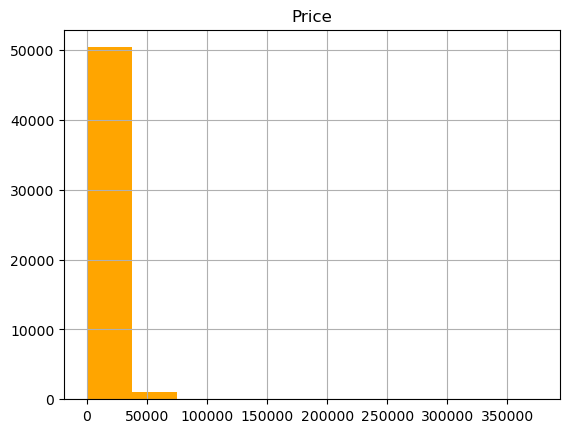

In [117]:
df['price'].hist( color='orange')
plt.title('Price')
plt.show()

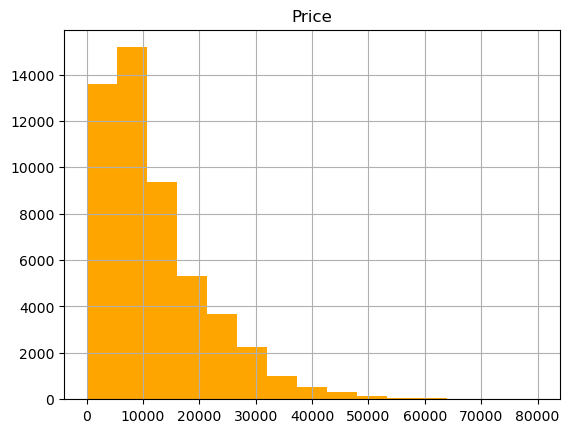

In [118]:
# Price
df['price'].hist(bins=15, range= (0,80000), color='orange')
plt.title('Price')
plt.show()


In [114]:
df['price'].describe()

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

Almost the same picture we see with the parameter 'age'. The age of vehicles varies from 1 to 111, but the main number of vehicles are from 0 to 20 years old. To see this we used a range argument during drawing the plot. The average age of the cars in our data is 9 years.

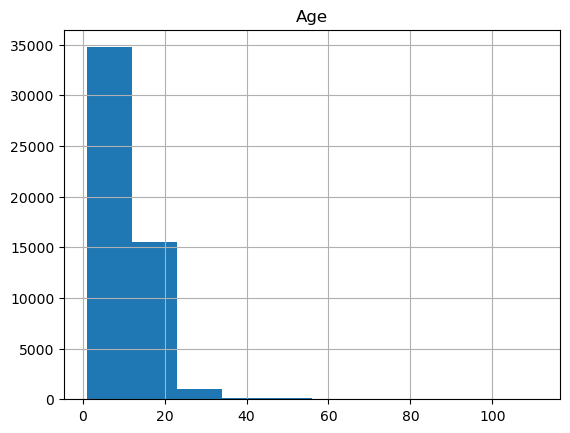

In [120]:
#The vehicle's age when the ad was placed
df['age'].hist()
plt.title('Age')
plt.show()

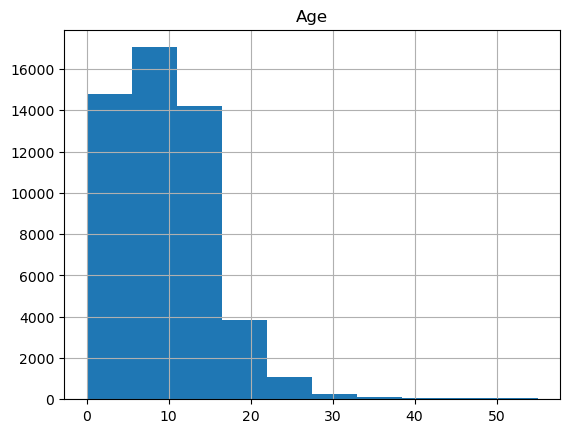

In [121]:
df['age'].hist(bins=10, range= (0,55))
plt.title('Age')
plt.show()

In [119]:
df['age'].describe()

count    51524.000000
mean         9.432672
std          6.148167
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

The mileage of vehicles that are selling varies 0 to 373200. With average value 13365.

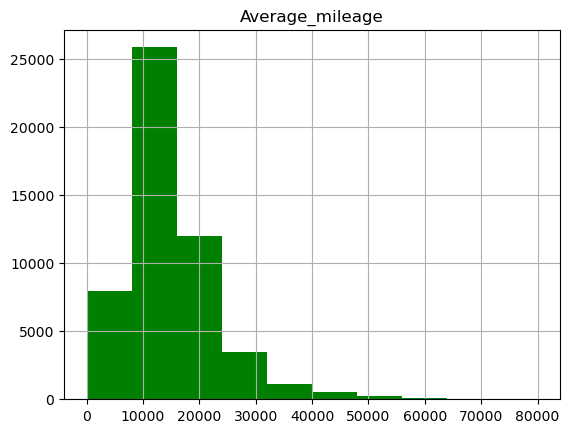

In [124]:
df['average_mileage'].hist(bins=10, range= (0,80000), color='green')
plt.title('Average mileage')
plt.show()

In [143]:
df['average_mileage'].describe()

count     51524.000000
mean      14925.734570
std        9305.534468
min           0.000000
25%        9802.000000
50%       13365.000000
75%       18111.250000
max      373200.000000
Name: average_mileage, dtype: float64

Predominantly people are selling vehicles with 8,6 or 4 cylinders. There are very few of 12 or 3 cylinders vehicles in our data.

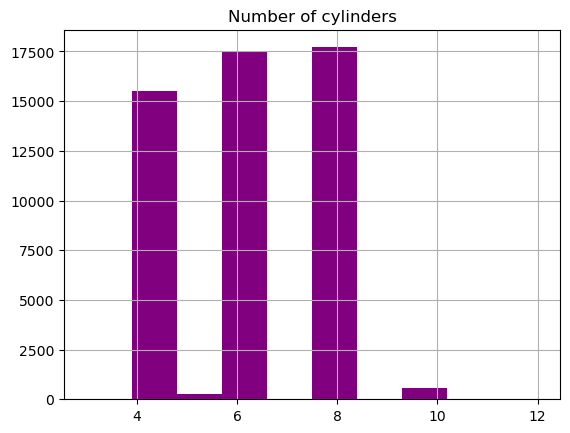

In [138]:
#Number of cylinders
df['cylinders'].hist(color='purple')
plt.title('Number of cylinders')
plt.show()

In [128]:
df['cylinders'].value_counts().sort_values(ascending=False)

8     17711
6     17457
4     15499
10      549
5       272
3        34
12        2
Name: cylinders, dtype: int64

The condition of vehicles in ads is mostly 'like new' and 'good'.

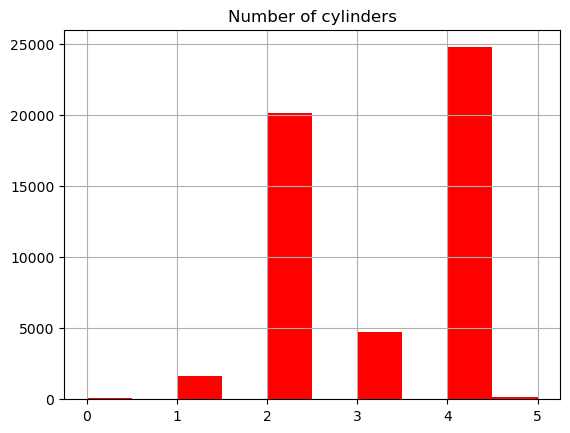

In [142]:
#Condition
df['condition'].sort_values().hist(color='red');
plt.title('Number of cylinders')
plt.show()

In [139]:
df['condition'].value_counts().sort_values(ascending=False)

4    24773
2    20144
3     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Study and treat outliers

While studying histogram of price, age and odometer parameters we saw that these columns might contain outliers. Let's draw boxplots and print statistics to be sure about this.

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

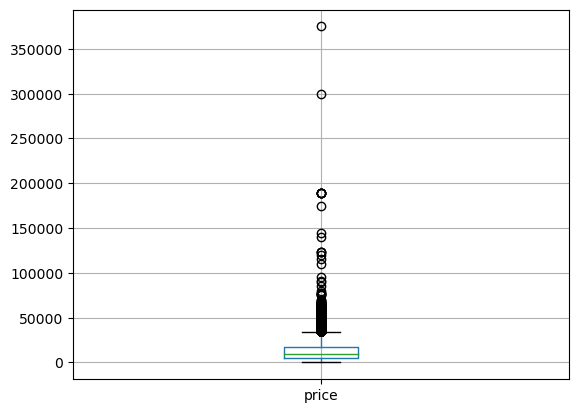

In [60]:
# Determine the lower limits for outliers
df.boxplot('price') 
df['price'].describe()

As we see at the plot above, there are outliers in this column from the value 30000 to 375000.

The next parameter with outliers is 'age'. This parameter has outliers from 25 to 110

count    51524.000000
mean         9.432672
std          6.148167
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

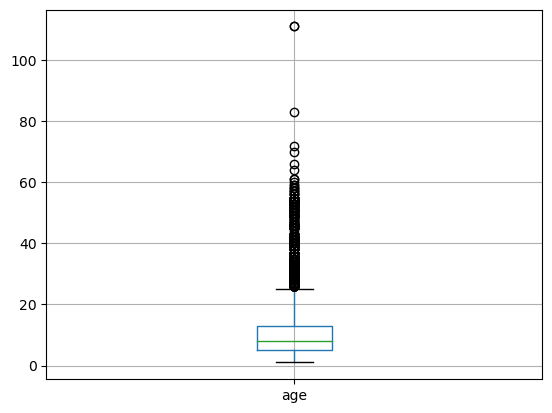

In [61]:
df.boxplot('age') 
df['age'].describe()

The last parametrs with outliers is 'average_mileage'. The values from 35000 to 370000 are out of normal range.

count     51524.000000
mean      14925.734570
std        9305.534468
min           0.000000
25%        9802.000000
50%       13365.000000
75%       18111.250000
max      373200.000000
Name: average_mileage, dtype: float64

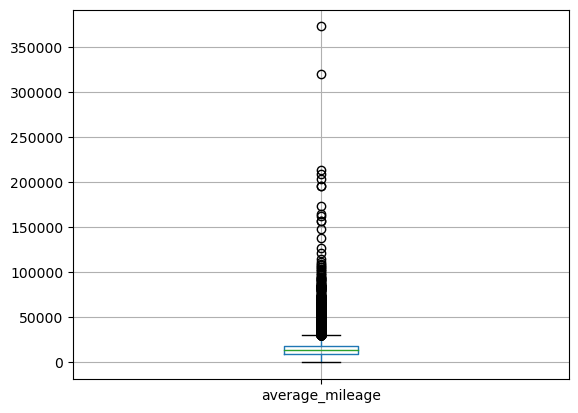

In [62]:
df.boxplot('average_mileage')
df['average_mileage'].describe()

In our opinion parametrs number of cylinders and condition of the car don't have outliers

Let's make a clean data, without outlies.

In [63]:
# Store data without outliers in a separate DataFrame
clean_data=df[(df['price']<30000)&(df['age']<25)&(df['average_mileage']<35000)]
display(clean_data)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknow,True,2018-06-23,19,8,18125
1,25500,2013,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,14784
2,5500,2013,hyundai sonata,3,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,7,15714
3,1500,2003,ford f-150,1,8,gas,175165,automatic,pickup,unknow,False,2019-03-22,9,17,10303
4,14900,2017,chrysler 200,4,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,3,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,3,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,6,14689
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,17,10676
51522,3950,2009,hyundai sonata,4,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,10,12800
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,6,23262


## Study core parameters without outliers

Now we can compare filtered data with the earlier ones (that included outliers). We can say that all new histograms look closer to normal distribution. 

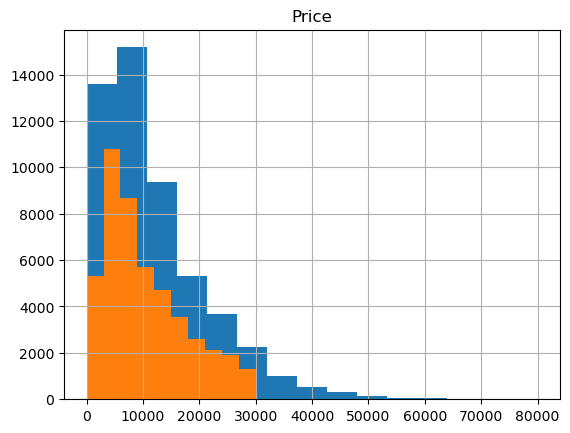

In [144]:
df['price'].hist(bins=15, range= (0,80000))
clean_data['price'].hist()
plt.title('Price')
plt.show()

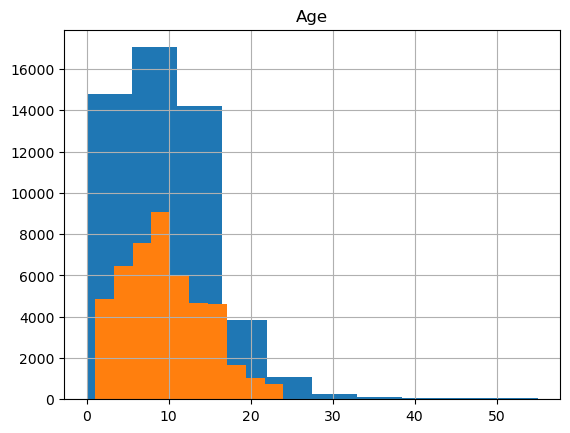

In [145]:
df['age'].hist(bins=10, range= (0,55))
clean_data['age'].hist()
plt.title('Age')
plt.show()

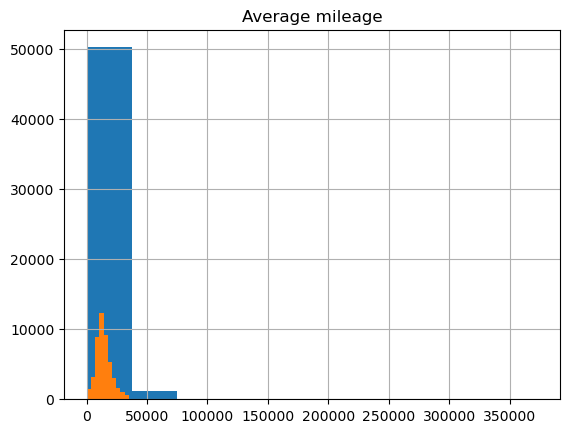

In [146]:
df['average_mileage'].hist()
clean_data['average_mileage'].hist()
plt.title('Average mileage')
plt.show()

Yes, now hisograms look better.

## Ads lifetime
According to our data, advertisements are displayed on site from 0 to 271 days. The average lifetime of an ad is nearly 1 month.

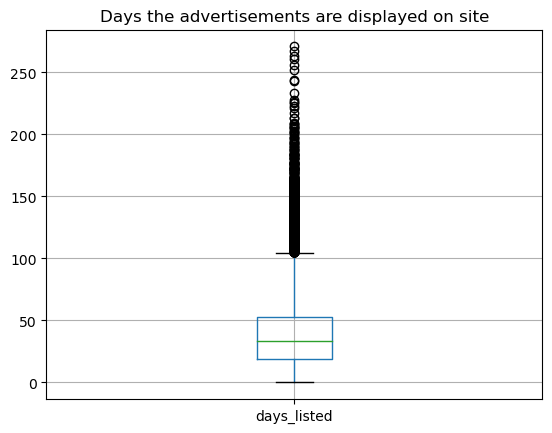

In [147]:
clean_data.boxplot('days_listed')
plt.title('Days the advertisements are displayed on site')
plt.show()


In [68]:
clean_data['days_listed'].describe()

count    46708.000000
mean        39.523529
std         28.150315
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

## Average price per each type of vehicle

    The greatest number of ads have SUV and sedan (9977 and 10183 ads respectively). We choose median to calculate average 
prices of different types of vehicles. We did it due to the quite a large data scatter. The heghest average prices have 
trucks and pickups(14999)

In [69]:
average_price= clean_data.groupby('type')['price'].aggregate(['count', 'median'])

In [70]:
display(average_price)

,count,median
type,,
SUV,11584,8495.0
bus,21,28990.0
convertible,331,12752.0
coupe,2005,12500.0
hatchback,996,5950.0
mini-van,1099,6200.0
offroad,174,12000.0
other,218,8797.5
pickup,5946,12995.0


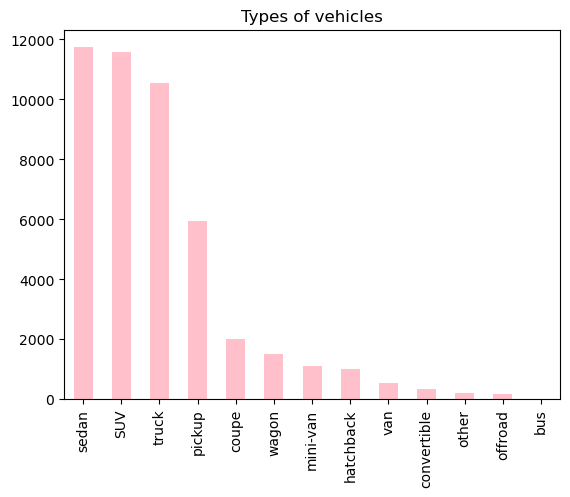

In [149]:
clean_data['type'].value_counts().plot(kind='bar', color='pink')
plt.title('Types of vehicles')
plt.show()

## Price factors

The most important question that we have for our analysis is what factors impact the price the most? Now we can take two the most popular types of vehicles (SUV and sedan) and study whether their price depends on age, mileage, condition, transmission type, and color. We are going to plot box-and-whisker charts for categorical variables (transmission type and color) and create scatterplots for the rest to achieve our goal.

According to the plots and correlation coefficients given below there are little negative correlation between price and age of the SUVs and there no correlation between price and average_mileage. So the older the vehicle is the cheaper it is.

In [72]:
SUV_data= clean_data[clean_data['type']== 'SUV']

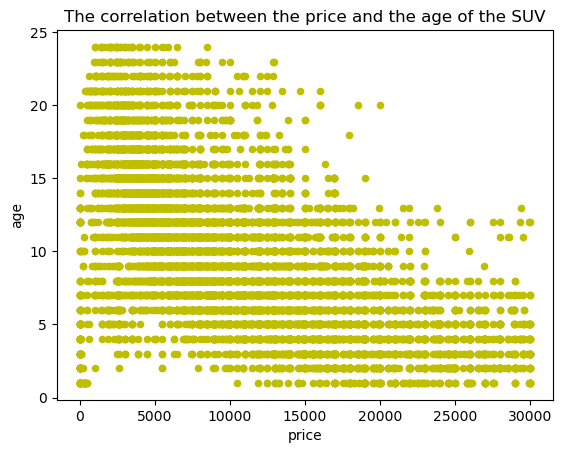

In [152]:
SUV_data.plot(x='price', y='age', kind = 'scatter', color= 'y')
plt.title('The correlation between the price and the age of the SUVs')
plt.show()

In [74]:
print(SUV_data['price'].corr(SUV_data['age']))

-0.5724874145140568


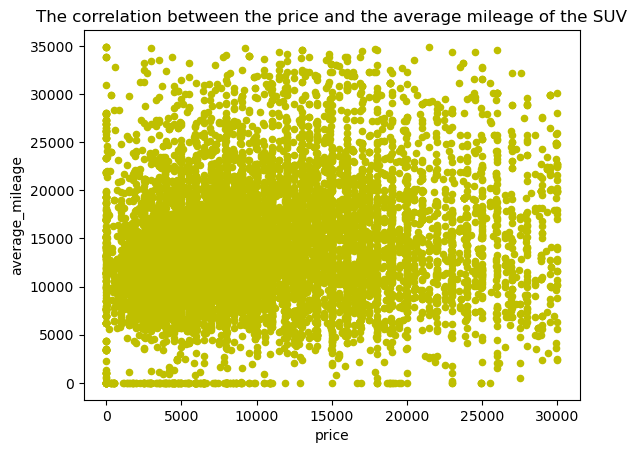

In [153]:
SUV_data.plot(x='price', y='average_mileage', kind = 'scatter', color= 'y')
plt.title('The correlation between the price and the average mileage of the SUVs')
plt.show()

In [76]:
print(SUV_data['price'].corr(SUV_data['average_mileage']))

0.17925183169733228


The price of SUVs depends on it condition. SUV in better condition costs more expensive.

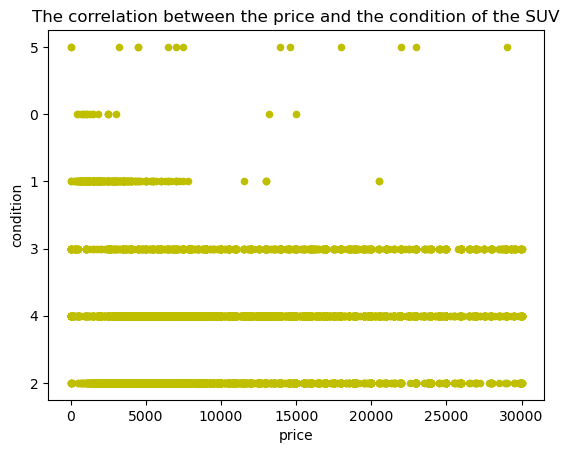

In [154]:
SUV_data.plot(x='price', y='condition', kind = 'scatter', color= 'y')
plt.title('The correlation between the price and the condition of the SUVs')
plt.show()

Now the time to check if the price of SUVs depends on the type of transmission. As we can see, SUVs with manual type of transmission is a little bit more expensive.  

In [78]:
df['transmission'].value_counts()

automatic    46902
manual        2828
other         1794
Name: transmission, dtype: int64

In [79]:
automatic = SUV_data[SUV_data['transmission'] =='automatic']
manual = SUV_data[SUV_data['transmission'] =='manual']
other = SUV_data[SUV_data['transmission'] =='other']

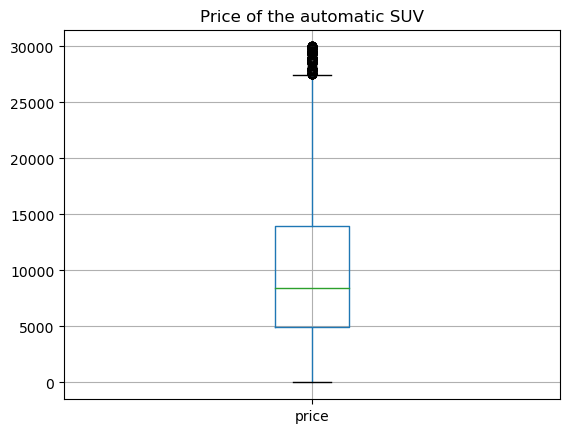

In [155]:
automatic.boxplot('price')
plt.title('Price of the automatic SUVs')
plt.show()

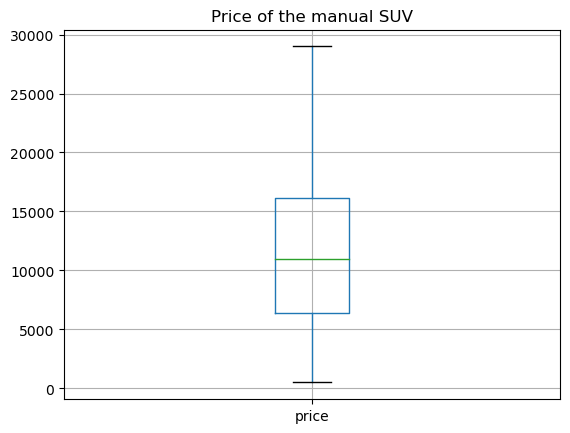

In [156]:
manual.boxplot('price')
plt.title('Price of the manual SUVs')
plt.show()

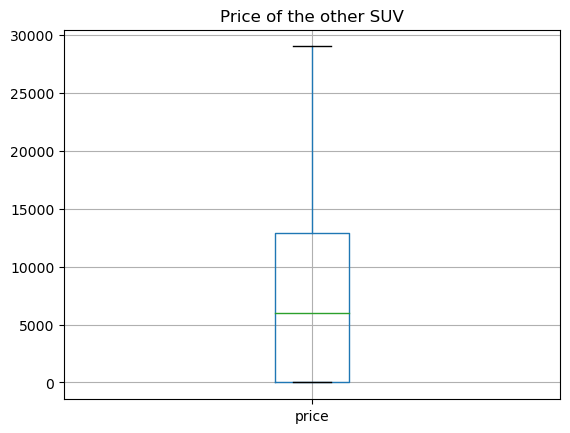

In [157]:
other.boxplot('price')
plt.title('Price of the other SUVs')
plt.show()

Let's study the price of SUVs of different colors. First of all we are going to filter data without missing values and than check vehicles what colors we have in our data. As we see there are plenty of them, but there are less then 50 yellow and purple vehicles, it is too few, we wouldn't use them in our analysis.

In [83]:
color_data_SUV= SUV_data[SUV_data['paint_color'].notnull()]

In [84]:
color_data_SUV['paint_color'].isna().sum()/len(df)

0.0

In [85]:
color_data_SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11584 entries, 0 to 51516
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            11584 non-null  int64         
 1   model_year       11584 non-null  int32         
 2   model            11584 non-null  object        
 3   condition        11584 non-null  object        
 4   cylinders        11584 non-null  int32         
 5   fuel             11584 non-null  object        
 6   odometer         11584 non-null  int32         
 7   transmission     11584 non-null  object        
 8   type             11584 non-null  object        
 9   paint_color      11584 non-null  object        
 10  is_4wd           11584 non-null  bool          
 11  date_posted      11584 non-null  datetime64[ns]
 12  days_listed      11584 non-null  int64         
 13  age              11584 non-null  int64         
 14  average_mileage  11584 non-null  int32

In [86]:
color_data_SUV['paint_color'].value_counts()

unknow    2084
black     2027
white     1784
silver    1493
grey      1110
blue       985
red        861
green      424
brown      357
custom     300
orange      77
yellow      43
purple      39
Name: paint_color, dtype: int64

In [87]:
black = color_data_SUV[color_data_SUV['paint_color'] =='black']
white = color_data_SUV[color_data_SUV['paint_color'] =='white']
silver = color_data_SUV[color_data_SUV['paint_color'] =='silver']
grey = color_data_SUV[color_data_SUV['paint_color'] =='grey']
blue = color_data_SUV[color_data_SUV['paint_color'] =='blue']
red = color_data_SUV[color_data_SUV['paint_color'] =='red']
green = color_data_SUV[color_data_SUV['paint_color'] =='green']
brown = color_data_SUV[color_data_SUV['paint_color'] =='brown']
custom = color_data_SUV[color_data_SUV['paint_color'] =='custom']
orange = color_data_SUV[color_data_SUV['paint_color'] =='orange']


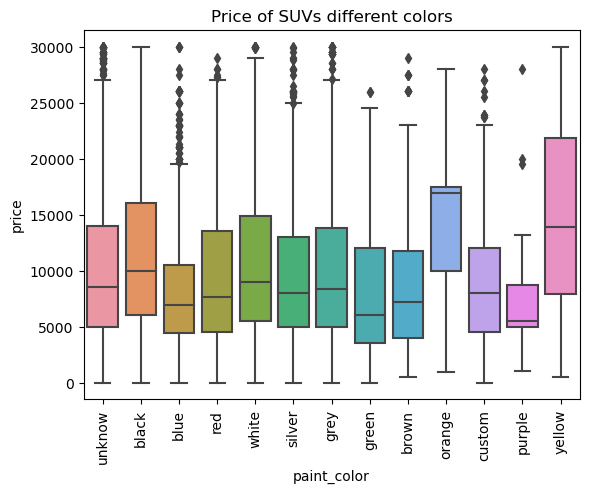

In [162]:
import seaborn as sns

sns.boxplot(data=color_data_SUV, y="price", x="paint_color")
plt.xticks(rotation = 90)
plt.title('Price of SUVs different colors')
plt.show()

Plot shows us that there is no significant difference between prices of SUVs of different colors. We can just notice that
black, white and orange SUVs are a little bit more expensive than others. Blue and green SUVs are a little bit cheaper than others.

It is the time to study sedans. There is a revers correlation between price and age of sedans and there no correlation between their price and average mileage. And we noticed a little correlation between condition of sedans and their price.

In [90]:
sedan_data= clean_data[clean_data['type']== 'sedan']

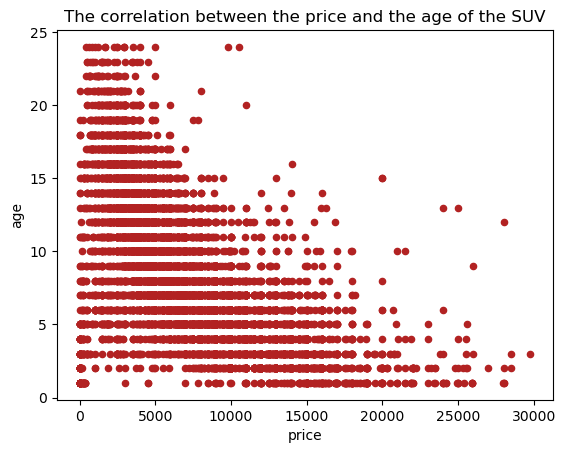

In [163]:
sedan_data.plot(x='price', y='age', kind = 'scatter', color='firebrick')
plt.title('The correlation between the price and the age of the sedans')
plt.show()

In [92]:
print(sedan_data['price'].corr(sedan_data['age']))

-0.6145396305967205


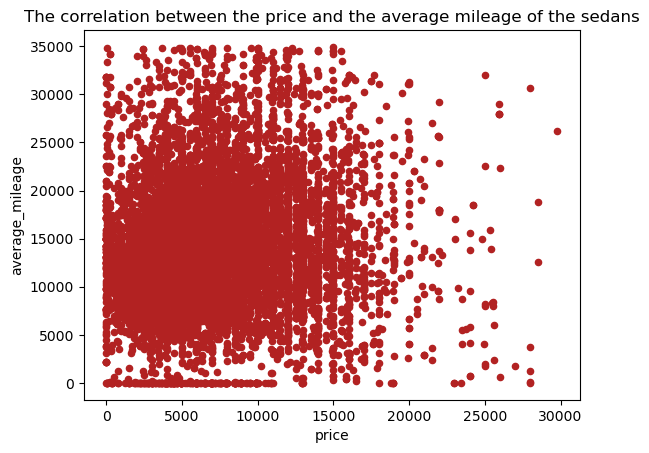

In [165]:
sedan_data.plot(x='price', y='average_mileage', kind = 'scatter', color='firebrick')
plt.title('The correlation between the price and the average mileage of the sedans')
plt.show()

In [94]:
print(sedan_data['price'].corr(sedan_data['average_mileage']))

0.12445229704316382


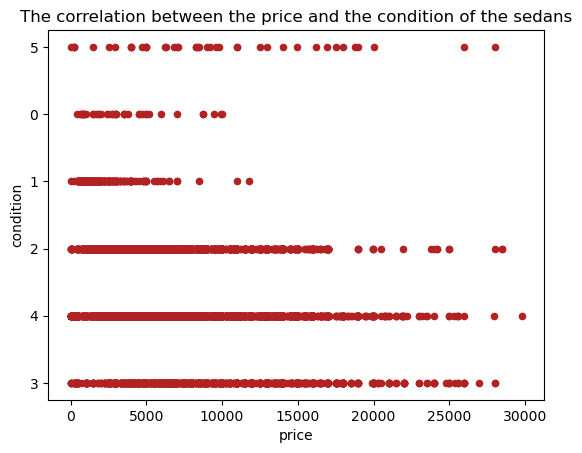

In [166]:
sedan_data.plot(x='price', y='condition', kind = 'scatter', color='firebrick')
plt.title('The correlation between the price and the condition of the sedans')
plt.show()

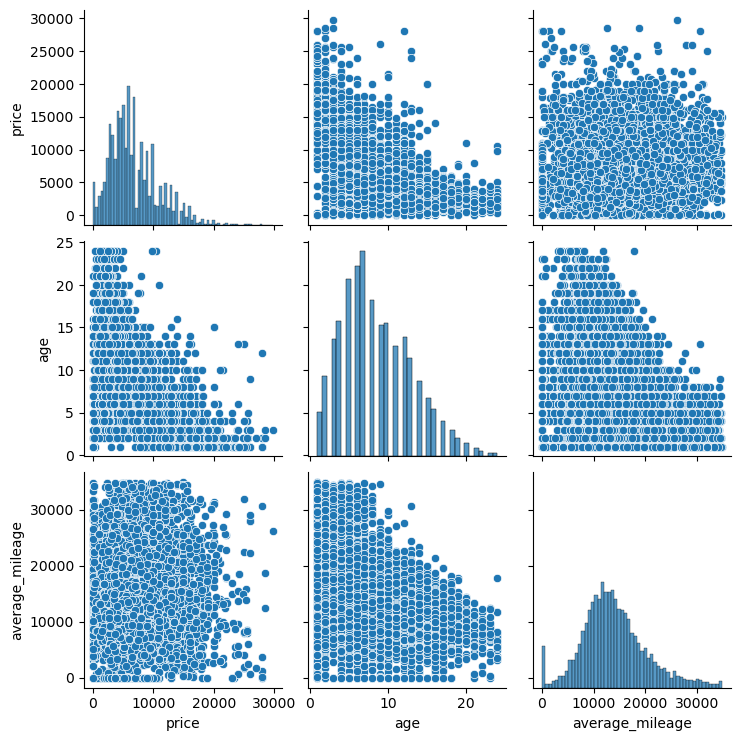

In [168]:
sns.pairplot(sedan_data[['price', 'age', 'average_mileage']]);

Plots bellow show us that sedans whith automatic type of transmission cost more than sedans with manual type of transmission (both top and median values are higher). 

In [97]:
automatic_sedan = sedan_data[sedan_data['transmission'] =='automatic']
manual_sedan = sedan_data[sedan_data['transmission'] =='manual']
other_sedan = sedan_data[sedan_data['transmission'] =='other']

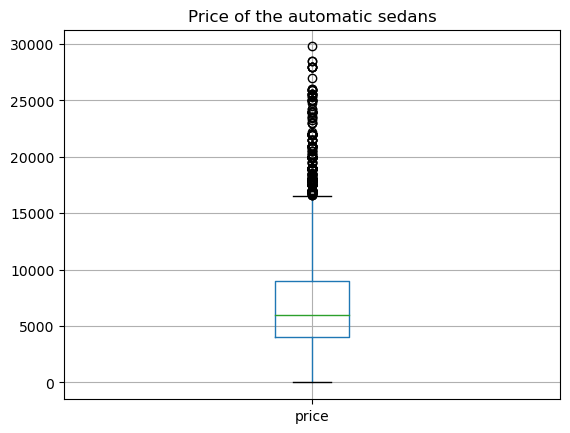

In [169]:
automatic_sedan.boxplot('price')
plt.title('Price of the automatic sedans')
plt.show()

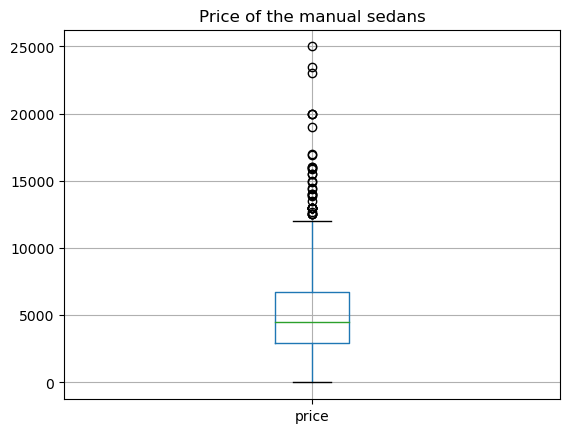

In [170]:
manual_sedan.boxplot('price')
plt.title('Price of the manual sedans')
plt.show()

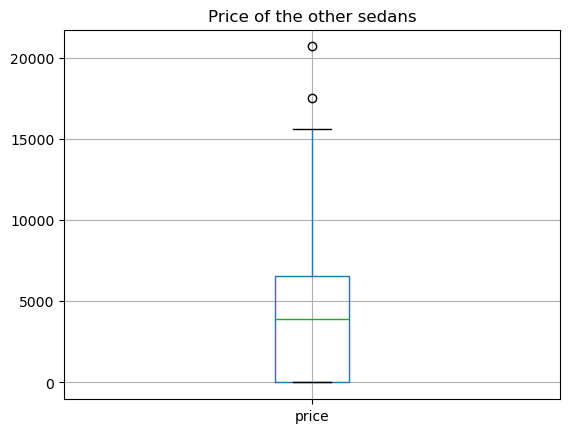

In [171]:
other_sedan.boxplot('price')
plt.title('Price of the other sedans')
plt.show()

There is a little correlation between colors and prices of sedans. The cheapest sedans are green and brown, the most expensive are orange black and white.

In [101]:
color_data_sedan= sedan_data[sedan_data['paint_color'].notnull()]

In [102]:
color_data_sedan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11740 entries, 2 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            11740 non-null  int64         
 1   model_year       11740 non-null  int32         
 2   model            11740 non-null  object        
 3   condition        11740 non-null  object        
 4   cylinders        11740 non-null  int32         
 5   fuel             11740 non-null  object        
 6   odometer         11740 non-null  int32         
 7   transmission     11740 non-null  object        
 8   type             11740 non-null  object        
 9   paint_color      11740 non-null  object        
 10  is_4wd           11740 non-null  bool          
 11  date_posted      11740 non-null  datetime64[ns]
 12  days_listed      11740 non-null  int64         
 13  age              11740 non-null  int64         
 14  average_mileage  11740 non-null  int32

In [103]:
black_sedan = color_data_sedan[color_data_sedan['paint_color'] =='black']
white_sedan = color_data_sedan[color_data_sedan['paint_color'] =='white']
silver_sedan = color_data_sedan[color_data_sedan['paint_color'] =='silver']
grey_sedan = color_data_sedan[color_data_sedan['paint_color'] =='grey']
blue_sedan = color_data_sedan[color_data_sedan['paint_color'] =='blue']
red_sedan = color_data_sedan[color_data_sedan['paint_color'] =='red']
green_sedan = color_data_sedan[color_data_sedan['paint_color'] =='green']
brown_sedan = color_data_sedan[color_data_sedan['paint_color'] =='brown']
custom_sedan = color_data_sedan[color_data_sedan['paint_color'] =='custom']
orange_sedan = color_data_sedan[color_data_sedan['paint_color'] =='orange']

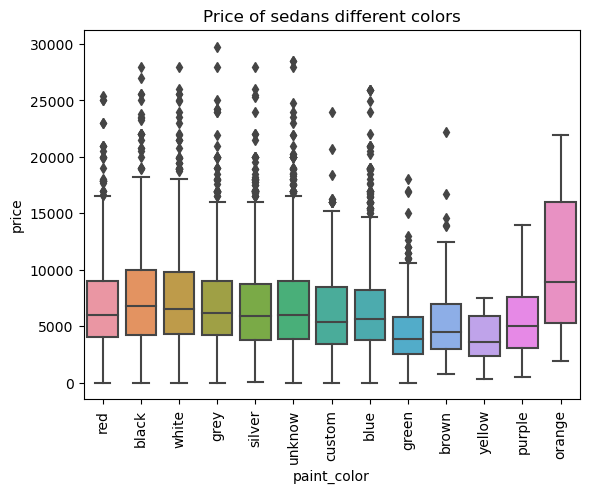

In [172]:
sns.boxplot(data=color_data_sedan, y="price", x="paint_color");
plt.xticks(rotation = 90)
plt.title('Price of sedans different colors')
plt.show()

## General conclusion

   Our data of free advertisements for vehicles had some problems so we had to clean it to proceed our analysis. We had missing
values. Some of them we replaced with the most common values among the vehicles of the specific model(model_year and
cylinders), some of them we fixed with average value of 2 parameters (odometer),some of them we didn’t touch because it is hard to guess on what these parameters depend (paint_color). We also had parameter with typos that we’ve fixed. 

   Further we fixed types of data, changed parameters model_year, odometer and cylinders from float to integer, parameter is_4wd to bool and parameter date_posted to datetime64[ns]. Fortunately we had any duplicates in the data. 
    
   We added additional factors to the data to make the analysis easier. These factors were datetime values, vehicle's age when 
the ad was placed, the vehicle's average mileage per year. Also we renamed the condition parameter.

   The core parameters (price, the vehicle's age when the ad was placed, mileage, number of cylinders, condition) were studied by using visualization.
   
   - Prices of the vehicles vary from 0 to 350000. But the main amount of cars costs from 0 to 40000. 
   - The age of vehicles varies from 0 to 100, but the main number of vehicles are from 0 to 20 years old. 
   - Predominantly people are selling vehicles with 8,6 or 4 cylinders. There are very few of 12 cylinders vehicles in our data.    - The condition of vehicles in ads is mostly 'like new' and 'good'. The mileage of vehicles that are selling varies 0 to 1.0le6.
     
  We drew boxplots and printed statistics to find and clean our data from outliers that we noticed during studying histograms. 
During the analysis, we learned that advertisements were displayed on site from 0 to 271 days. The average lifetime of an ad is nearly 1 month.

   The main question that we had for our analysis was what factors impact the price most? We chose two types of vehicles with the  greatest number of ads (SUV and sedan) and started. Using box-and-whisker charts and correlation coefficients we noticed:
   - the older the vehicle is the cheaper it is.
   - vehicle in better condition is more expensive. 
   - the bigger mileage the vehicle has the cheaper it is. 
   
   It is true both for SUV and sedans. 
   
   SUVs with manual type of transmission are a little bit more expensive than those SUVs that have automatic type of transmission. Sedans, on the contrary, are cheaper with manual transmission. Both types of cars are more expensive when they are black or orange. We should be careful with orange cars because there are too few of them. The cheapest SUVs and sedans are green and blue. 

